# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

In [44]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as pt

%matplotlib inline
sp.var("x")

def proc(f, l=-20, ltouch=True, r=20, rtouch=True):
    
    cp = sp.solve(sp.diff(f, x), x)
    df = sp.diff(sp.diff(f, x), x)
    evals = []
    i = 0
    for item in range(0, len(cp)):
        if cp[i] < l or cp[i] > r or (cp[i] == l and ltouch == False) or (cp[i] == r and rtouch == False):
            cp.pop(i)
            i -= 1
        evals.append(f.subs(x, cp[i]))
        i += 1
    if ltouch:
        evals.append(f.subs(x, l))
    else:
        evals.append(f.subs(x, np.linspace(l, l+0.00001, 10000)[1]))
    if rtouch:
        evals.append(f.subs(x, r))
    else:
        evals.append(f.subs(x, np.linspace(r-0.000001, r, 10000)[-2]))
    evals.sort()
    
    fn = sp.lambdify(x, f, "numpy")
    xn = np.arange(l, r, 0.1)
    xn = np.delete(xn, 0)
    xn = np.delete(xn, -1)
    yn = fn(xn)
    pt.figure()
    pt.grid()
    pt.plot(xn, yn, "green")
    for item in cp:
        if(df.subs(x, item)<0):
            typem = "Máximo relativo"
            if(f.subs(x, item) == evals[-1]):
                typem = "Máximo absoluto"
        elif(df.subs(x, item)>0):
            typem = "Mínimo relativo"
            if(f.subs(x, item) == evals[0]):
                typem = "Mínimo absoluto"
        else:
            typem="Indeterminado"
        print("x = {} ({})".format(item, typem))
        pt.plot(item, fn(float(item)), "ro")

$f(x)=1260+117x-9x^2$

x = 13/2 (Máximo absoluto)


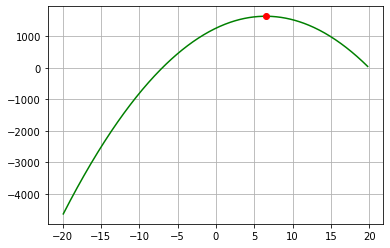

In [45]:
proc(1260+117*x-9*x**2)  

$f(x)=5+x+\frac{4}{x}$, para $x>0$

x = 2 (Mínimo absoluto)


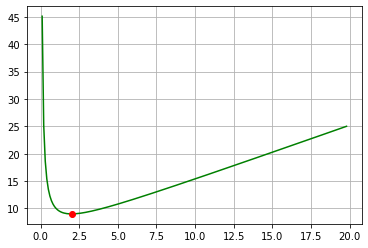

In [46]:
proc(5+x+4/x, 0, False)

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

x = -2.44948974278318 (Máximo absoluto)


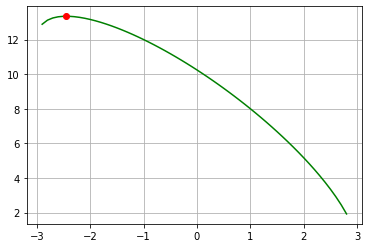

In [47]:
proc(6-2*x+(18-2*(x**2))**(1/2), -3, True, 3, True)

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

x = -2 (Mínimo absoluto)
x = 0 (Máximo relativo)
x = 1 (Mínimo relativo)


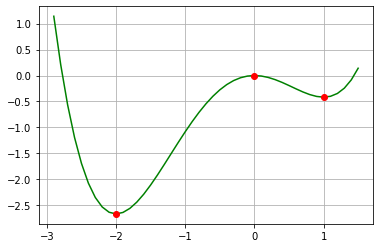

In [48]:
proc((x**4)/4+(x**3)/3-x**2, -3, True, 1.7, True)

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

In [6]:
import sympy as sp
sp.var("l")
sp.var("r")
sp.var("h")
p = 2*r+2*l-10
p = sp.solve(p, l)[-1]
d = h**2+r**2-l**2
d = sp.solve(d, h)[-1]
d = d.subs(l, p)
opFun = (sp.pi*r**2*h)/3
opFun = opFun.subs(h, d)
cp = sp.solve(sp.diff(opFun, r), r)[-1]
side = p.subs(r, cp)
print("Lado 1: {}".format(side))
print("Lado 2: {}".format(side))
print("Lado 3: {}".format(cp*2))

Lado 1: 3
Lado 2: 3
Lado 3: 4


Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [13]:
import sympy as sp
sp.var("l1")
sp.var("l2")
p = l1+2*l2-6
p = sp.solve(p, l2)[-1]
a = l1*l2
a = a.subs(l2, p)
side1 = sp.solve(sp.diff(a, l1), l1)[-1]
side2 = p.subs(l1, side1)
print("Lado 1: {}".format(side1))
print("Lado 2: {}".format(side2))
print("Lado 3: {}".format(side2))

Lado 1: 3
Lado 2: 3/2
Lado 3: 3/2
